# Stock Market Analysis Project


The purpose of this project is basically to practice my skills in some of the libraries (mainly numpy, pandas and matplotlib) while also performing a *very* basic stock market analysis. The format of this project is inpired by Jose Portilla's "Python for Financial Analysis and Algorithmic Trading" course on Udemy and virtually follows the exact procedures outlined in his lectures. We'll be analyzing stock data related to a few car companies, from Jan 1 2019 to Jan 1 2020. However, full disclosure - the sole purpose of this project is to brush up my skills in the aforementioned libraries. Therefore, please do not infer any financial trading advice from the analysis we do here :)

### Part 0: Import


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)



In [2]:
import pandas_datareader
import datetime


In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,1,1)
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [5]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500,67.070000


### Other Car Companies


In [6]:
ford = web.DataReader('F', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)

In [7]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,8.02,7.48,7.53,7.90,47494400.0,7.157524
2019-01-03,7.99,7.78,7.97,7.78,39172400.0,7.048802
2019-01-04,8.12,7.85,7.91,8.08,43039800.0,7.320606
2019-01-07,8.37,8.03,8.11,8.29,40729400.0,7.510870
2019-01-08,8.54,8.35,8.42,8.37,45644000.0,7.583352


In [8]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,33.810001,32.410000,32.849998,33.639999,7662300.0,31.893360
2019-01-03,33.680000,32.200001,33.340000,32.250000,11618300.0,30.575533
2019-01-04,33.570000,32.430000,32.799999,33.330002,10784000.0,31.599455
2019-01-07,34.970001,33.480000,33.709999,34.360001,10722300.0,32.575977
2019-01-08,35.680000,34.490002,35.000000,34.810001,10532900.0,33.002617


## Part 2: Visualizing the Data


____

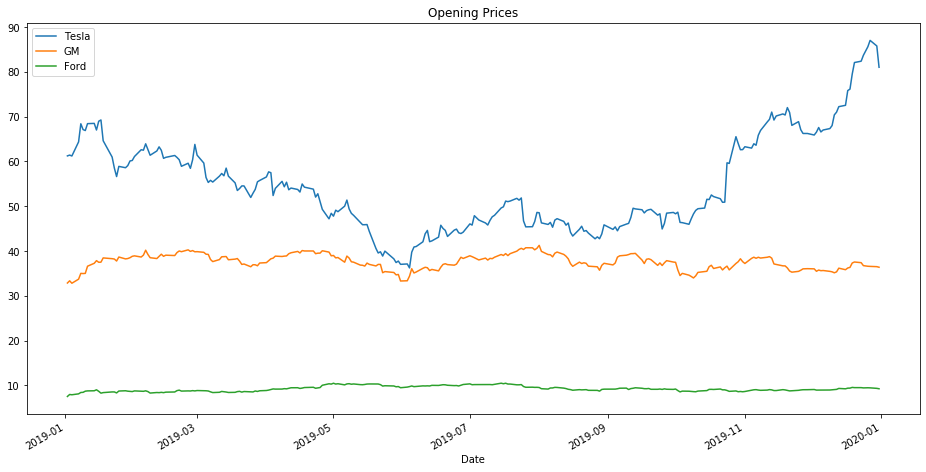

In [9]:
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

** Plotting the Volume of stock traded each day.**

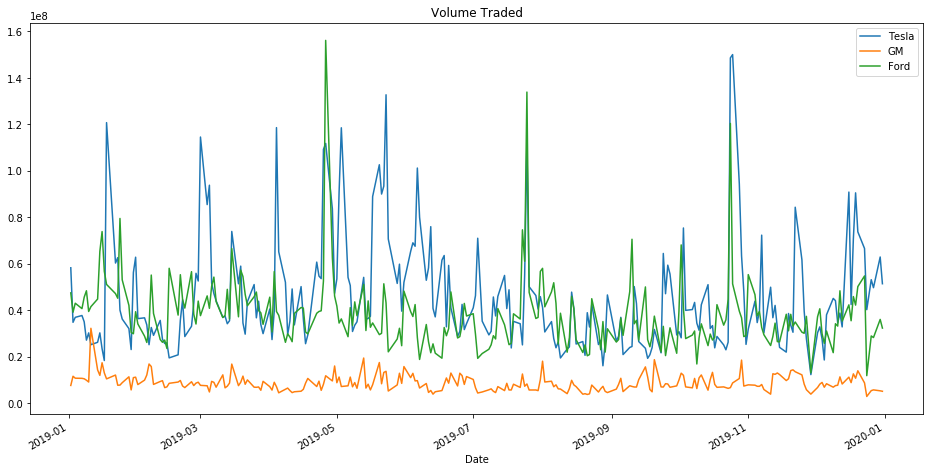

In [10]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

Interesting, looks like Ford had a really big spike somewhere in late April 2019. It turns out Ford's shares climbed 19% in April after the automaker reported first-quarter results that came in well ahead of expectations, giving investors reason to believe the company's ongoing restructuring campaign at that time will yield favorable results.

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do a a simple calculation is to try to represent the total money traded by multplying the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. 

In [11]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

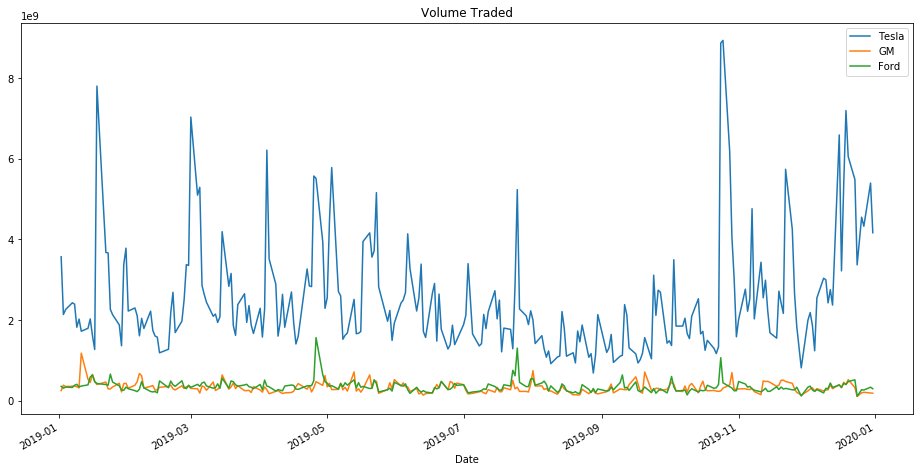

In [12]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();


Not surprisingly, it seems that Tesla was traded at a much larger scale compared to Ford and GM. Another interesting 
thing to point out is that it looks like there was huge amount of money traded for Tesla somewhere around late October 2019. It turns out Tesla's stock price soared at 30.7% during that month. This came after the electric vehicle maker and power storage solutions leader announced better-than-expected third-quarter 2019 results, which can help explain the spike in the volume of trades during that month.  

____

Let's practice plotting out some MA (Moving Averages). We begin by plotting out the MA50 and MA200 for GM.

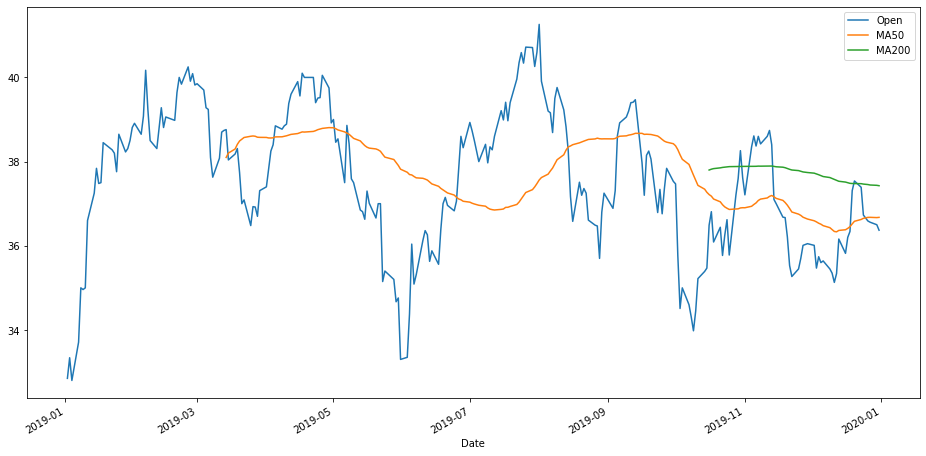

In [13]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16,8));

______

Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.

In [14]:
from pandas.plotting import scatter_matrix

In [15]:
car_companies = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_companies.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [16]:
car_companies.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2019-01-02,61.220001,32.849998,7.53
2019-01-03,61.400002,33.340000,7.97
2019-01-04,61.200001,32.799999,7.91
2019-01-07,64.344002,33.709999,8.11
2019-01-08,68.391998,35.000000,8.42


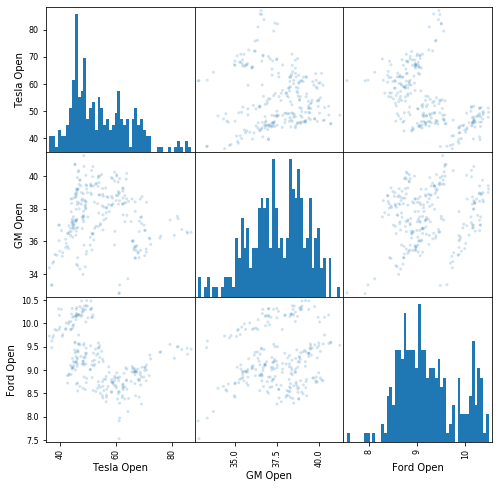

In [34]:
scatter_matrix(car_companies, figsize=(8,8), alpha=0.2,hist_kwds={'bins':50});

We can see that GM and Ford are somewhat correlated. However, when it comes to tesla, there is no visible correlation with either GM or Ford.

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we  do often when working with quantiative data. 
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable.

We will now create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or we can also use pandas' built in pct_change method.

In [18]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) -1 

In [19]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [20]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [21]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-01-02,8.02,7.48,7.53,7.90,47494400.0,7.157524,3.576328e+08,NaN
2019-01-03,7.99,7.78,7.97,7.78,39172400.0,7.048802,3.122040e+08,-0.01519
2019-01-04,8.12,7.85,7.91,8.08,43039800.0,7.320606,3.404448e+08,0.03856
2019-01-07,8.37,8.03,8.11,8.29,40729400.0,7.510870,3.303154e+08,0.02599
2019-01-08,8.54,8.35,8.42,8.37,45644000.0,7.583352,3.843225e+08,0.00965


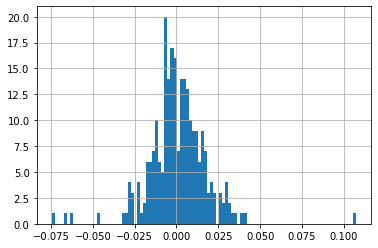

In [22]:
ford['returns'].hist(bins=100);

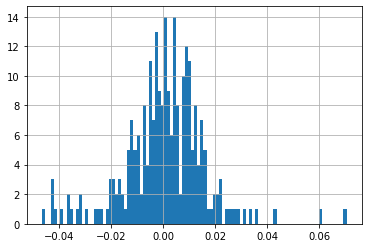

In [23]:
gm['returns'].hist(bins=100);

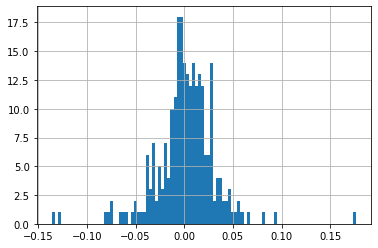

In [24]:
tesla['returns'].hist(bins=100);

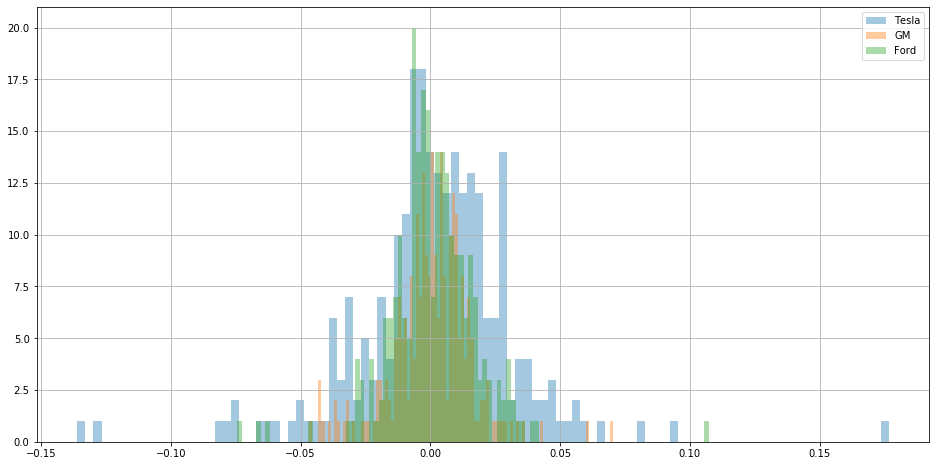

In [25]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(16,8), alpha=0.4)
gm['returns'].hist(bins=100, label='GM', figsize=(16,8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(16,8), alpha=0.4)
plt.legend();

We can see from the chart that GM and Ford tend to be more stable. However, Tesla's stock seems to be a lot more volatile, as seen from a higher variance from the graph.  

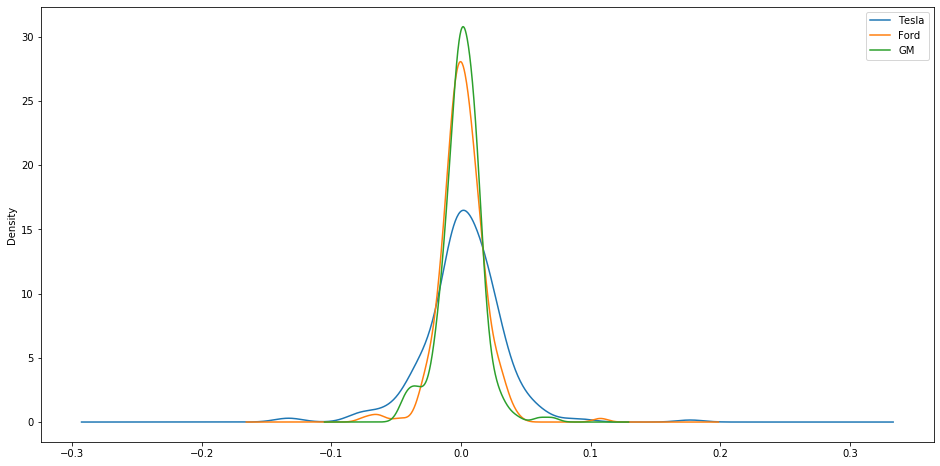

In [26]:
tesla['returns'].plot(kind='kde',label='Tesla', figsize=(16,8))
ford['returns'].plot(kind='kde',label='Ford', figsize=(16,8))
gm['returns'].plot(kind='kde',label='GM', figsize=(16,8))
plt.legend();

From the kernel density estimation we can see that GM and Ford have the highest peaks centred around zero which shows that they are a lot more stable than Tesla, which has a much lower peak. Tesla's KDE is alos wider which shows its volatility.

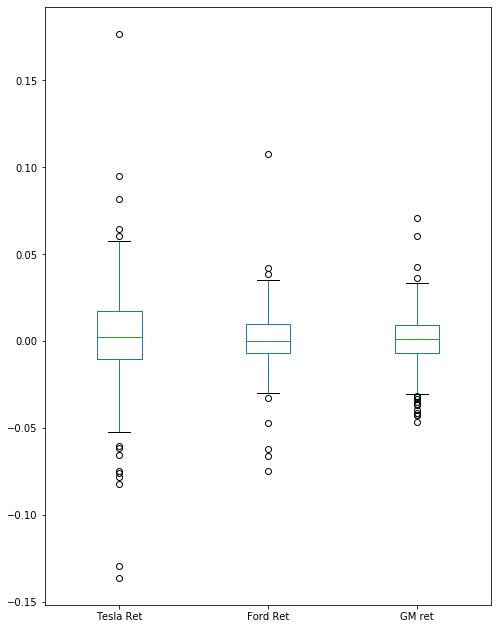

In [27]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM ret']
box_df.plot(kind='box', figsize=(8,11));

## Comparing Daily Returns between Stocks

We will now create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the question of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

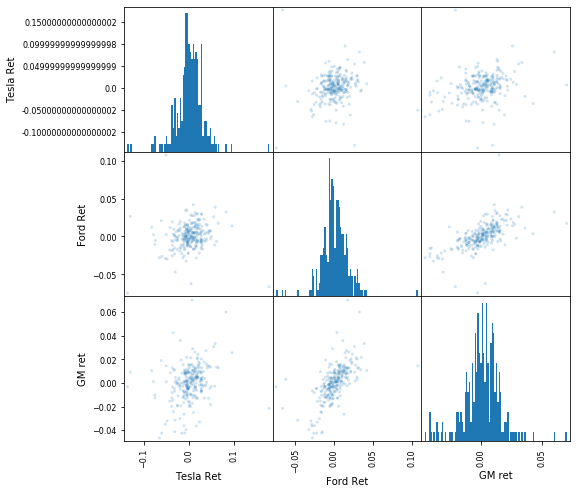

In [28]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2,hist_kwds={'bins':100});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely.

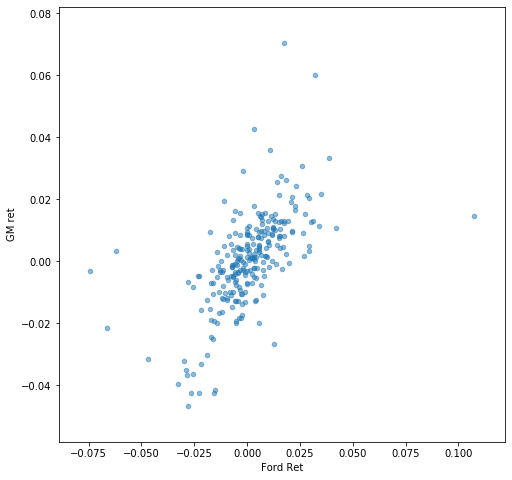

In [29]:
box_df.plot(kind='scatter', x = 'Ford Ret', y='GM ret', alpha=0.5, figsize=(8,8));

____
## Cumulative Daily Returns

Now we can see which stock was the most wide ranging in daily returns ( it was indeed Tesla, in fact our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is it  worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. However, it is important to note that our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [30]:
tesla['Cumulative Returns'] = (1 + tesla['returns']).cumprod()

In [31]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Returns
Date,,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000,62.023998,3.568698e+09,NaN,NaN
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000,60.071999,2.138316e+09,-0.031472,0.968528
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500,63.537998,2.262595e+09,0.057697,1.024410
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000,66.991997,2.429372e+09,0.054361,1.080098
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500,67.070000,2.396627e+09,0.001164,1.081356


In [32]:
ford['Cumulative Returns'] = (1 + ford['returns']).cumprod()
gm['Cumulative Returns'] = (1 + gm['returns']).cumprod()


Now we plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

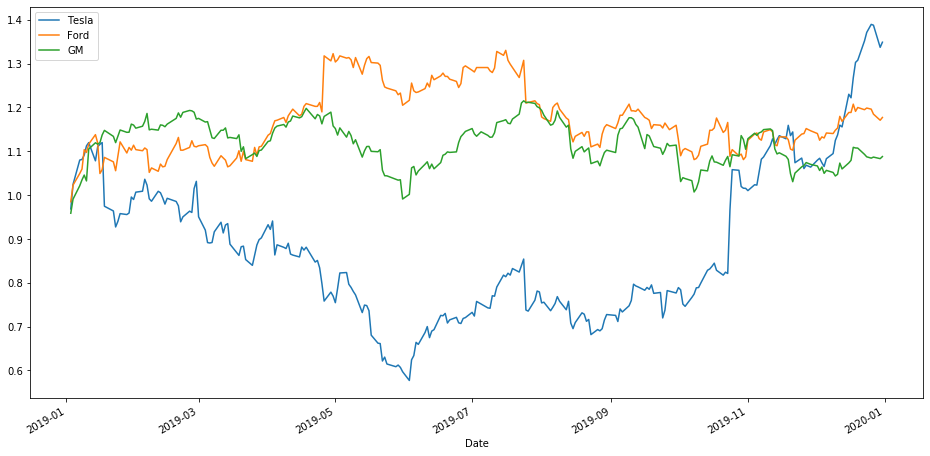

In [33]:
tesla['Cumulative Returns'].plot(label='Tesla', figsize=(16,8))
ford['Cumulative Returns'].plot(label='Ford', figsize=(16,8))
gm['Cumulative Returns'].plot(label='GM', figsize=(16,8))
plt.legend();

It turns out that for every 1 dollar invested in 2019-01, the stock that yielded the highest cumulative return one year later was Tesla's (where we would have about a dollar and forty cents, followed by Ford ( a dollar and fifteen cents) and then General Motors (a dollar and ten cents). Thus, despite its sheer volatility, we would be best off investing in Tesla. Thus in Elon we trust ;)